## Gradient Boosting Regression (회귀 분석)

라이브러리

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

<br>

### 기본 제공 데이터셋 boston house dataset

데이터 준비

In [2]:
boston = datasets.load_boston()

train / test 데이터

In [3]:
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)

offset = int(X.shape[0] * 0.9) # 전체 데이터에서 90% train data

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

GradientBoostingRegressor 모델 학습

In [21]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}

# 모델 생성
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

MSE

In [4]:
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 6.4166


Plot training deviance 에러에 관한 그래프 -> **회귀분석일때만 가능**

Text(0, 0.5, 'Deviance')

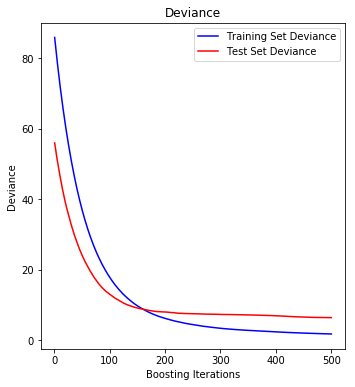

In [5]:
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

# 많이 쓰지는 않음
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

- Boosting Iterations : boosting 반복, 500개의 의사결정트리 만듦
- Deviance : 편차, 에러

**결정트리가 많아질수록 오차값이 줄어듦**

<br>

Plot feature importance

In [7]:
clf.feature_importances_

array([2.58311219e-02, 1.76038024e-04, 1.74623211e-03, 9.25385312e-05,
       2.84685910e-02, 3.56344034e-01, 1.18627591e-02, 7.88860474e-02,
       1.72858003e-03, 1.57021254e-02, 2.13252131e-02, 1.00257124e-02,
       4.47811007e-01])

In [8]:
sum(clf.feature_importances_)

0.9999999999999999

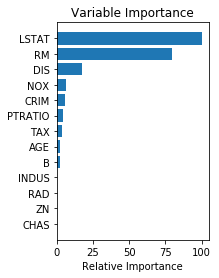

In [6]:
feature_importance = clf.feature_importances_ # 각각의 열마다 중요도값

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

- Model explainablity & interpretability
- feature selection

---

<br>

## Gradient Boosting Classification (분류분석)

라이브러리

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### 유방암 발생률 데이터

데이터 준비

In [9]:
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

In [12]:
# train data 90% / test data 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)

GradientBoostingClassifier 모델 학습

In [13]:
params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

accuracy

In [14]:
acc = accuracy_score(y_test, clf.predict(X_test))
print("The accuracy score on test set: {:.4f}".format(acc))

The accuracy score on test set: 0.9123


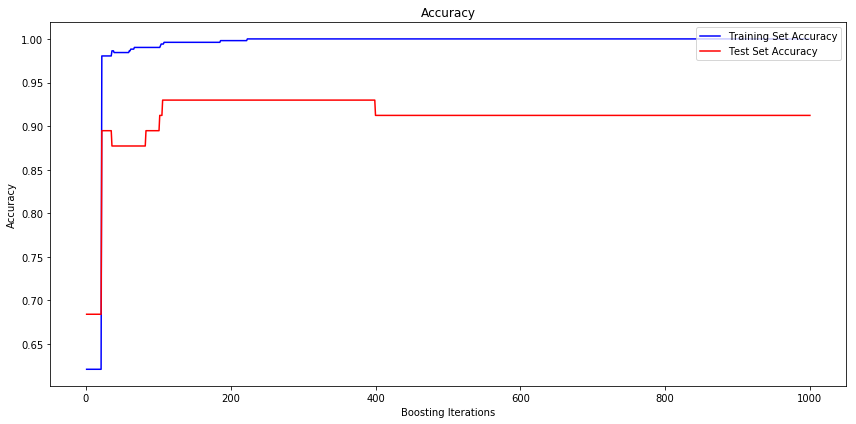

In [15]:
train_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict(X_train)):
    train_score[i] = accuracy_score(y_train, y_pred)

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = accuracy_score(y_test, y_pred)
    
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('Accuracy') # Binomial deviance loss function for binary classification
plt.plot(np.arange(params['n_estimators']) + 1, train_score, 'b-', label='Training Set Accuracy')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Accuracy')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Accuracy')
fig.tight_layout()
plt.show()

feature importance

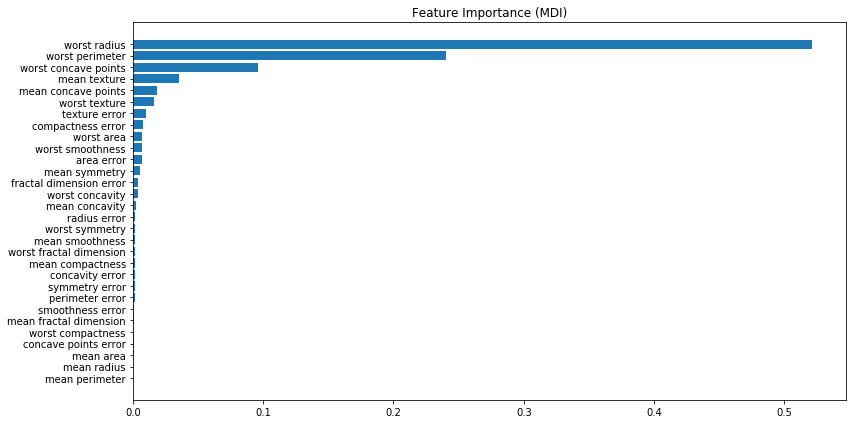

In [17]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(12, 6))

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(cancer.feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')

fig.tight_layout()
plt.show()

ROC curve & AUC

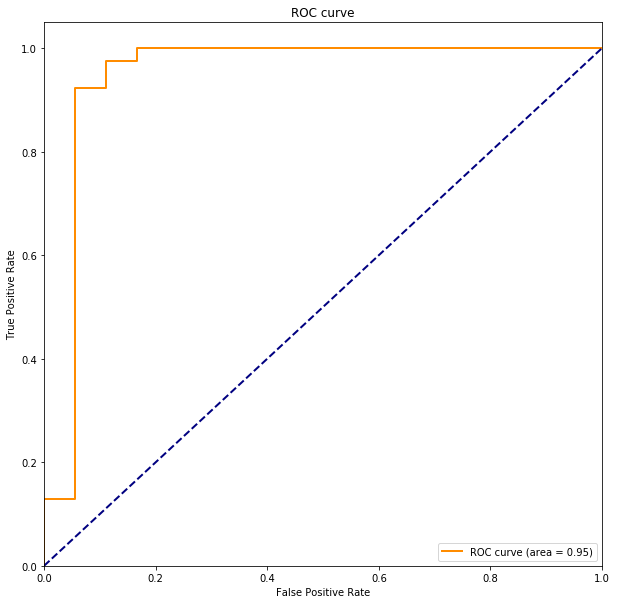

In [18]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=clf.predict_proba(X_test)[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

Precision / Recall / F1-score

In [19]:
from sklearn.metrics import classification_report

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions)) # Precision, Recall, F1-score 등을 확인할 수 있습니다.

print("Accuracy on Training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(clf.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.95      0.92      0.94        39

   micro avg       0.91      0.91      0.91        57
   macro avg       0.89      0.91      0.90        57
weighted avg       0.91      0.91      0.91        57

Accuracy on Training set: 1.000
Accuracy on Test set: 0.912
